## Distribucion de Criaturas por el mapa

In [37]:
df_creatures=dataframes['creatures']

In [38]:
df_creatures.head(2)

,name,locations,dlc
0,black knight,"['scorpion river catacombs', 'castle ensis', 'church of consolation', 'fog rift catacombs', 'shadow keep']",1
1,bigmouth imp,"['darklight catacombs', 'fog rift catacombs', 'scorpion river catacombs']",1


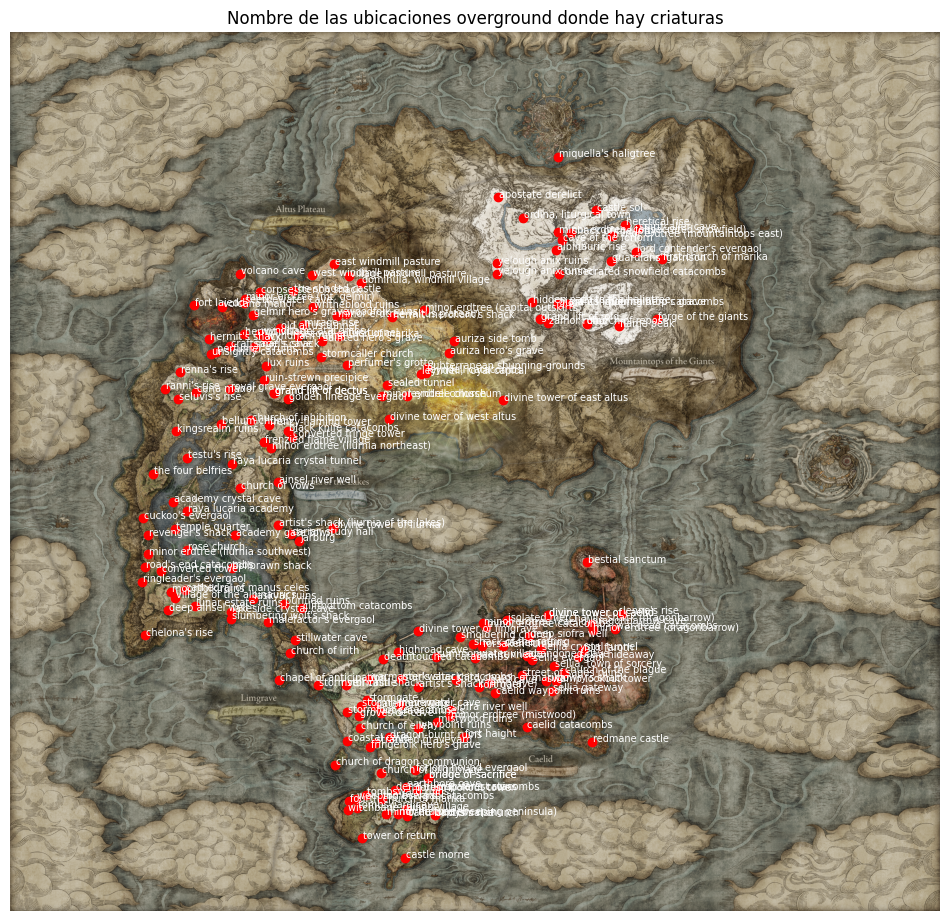

In [39]:
# Aplicar transformación a todas las filas
df_combined['pixel_coords'] = df_combined.apply(lambda row: custom_to_pixel(row['x'], row['y']), axis=1)

# Separar las coordenadas pixel en columnas
df_combined['x_pixel'] = df_combined['pixel_coords'].apply(lambda p: p[0])
df_combined['y_pixel'] = df_combined['pixel_coords'].apply(lambda p: p[1])

# Filtrar filas donde haya bosses (asumiendo bosses no vacío o >0)
df_creatures = df_creatures[df_creatures['locations'].notnull() & (df_creatures['locations'] != '')]

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)

for _, row in df_combined.iterrows():
    if pd.notnull(row['x_pixel']) and pd.notnull(row['y_pixel']):
        ax.plot(row['x_pixel'], row['y_pixel'], 'ro')  # punto rojo
        # Opcional: mostrar nombre
        ax.text(row['x_pixel']+10, row['y_pixel'], row['location'], fontsize=7, color='white')

plt.axis('off')
plt.title('Nombre de las ubicaciones overground donde hay criaturas')
plt.show()

## Conteo de Criaturas por region

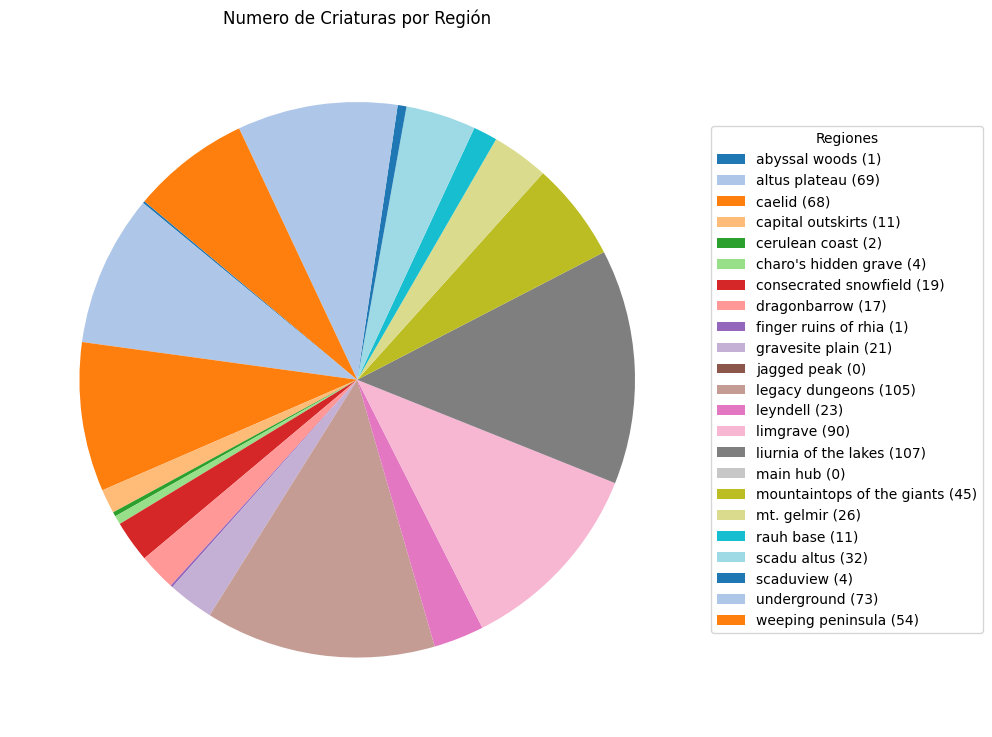

In [40]:
# Convierte strings en listas reales y NaN en listas vacías
def parse_creatures(x):
    if isinstance(x, float) and np.isnan(x):
        return []
    elif isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x  
    
df_combined['creatures'] = df_combined['creatures'].apply(parse_creatures)   

# Agrupar por región y contar criaturas
df_combined['creatures_count'] = df_combined['creatures'].apply(lambda x: len(x) if isinstance(x, list) else 0)
creatures_per_region = df_combined.groupby('region')['creatures_count'].sum()

# Prepara los datos
labels = [f"{region} ({count})" for region, count in creatures_per_region.items()]
sizes = creatures_per_region.values
colors = plt.cm.tab20.colors  # Puedes usar otro colormap como 'Set3', 'Accent', etc.

# Grafico
fig, ax = plt.subplots(figsize=(10,10))
wedges, texts = ax.pie(sizes, colors=colors[:len(sizes)], startangle=140)

# Leyendas
ax.legend(wedges, labels,
          title="Regiones",
          loc="center left",
          bbox_to_anchor=(1, 0.5))

ax.set_title("Numero de Criaturas por Región")
plt.tight_layout()
plt.show()

En el grafico donde se contabilizo las criaturas se puede observar que la mayor concentracion de criaturas estan en la region de legacy dungeons que son mazmorras en el mapa, exceptuandolas la segunda region que encabeza la concentracion es en liurnia of the lakes. 